In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt 
%matplotlib inline

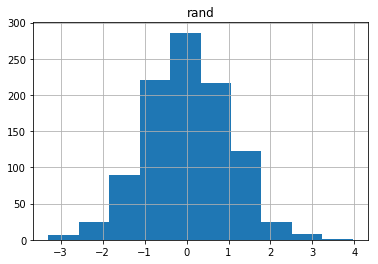

In [2]:
mean = 0
sd = 1
n = 1000

df = pd.DataFrame({'rand': np.random.normal(mean, sd, 1000)})

df.hist()

plt.show()

In [3]:
rand1 = np.random.normal(50, 300, 1000)
rand2 = np.random.poisson(1, 1000)

#sort the values in ascending order.
rand1.sort()
rand2.sort()

#Make a standard normally distributed variable with 1000 observations,
# a mean of 0, and sd of 1 that we will use as comparison.
norm = np.random.normal(0, 1, 1000)

#sort the values in ascending order.
norm.sort()

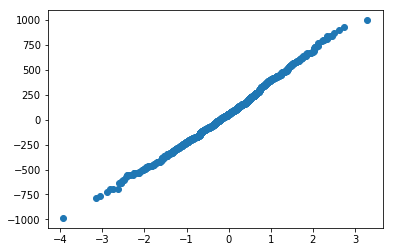

In [4]:
#plot the variable rand1 against norm in qqplots.
plt.plot(norm, rand1, "o")
plt.show()

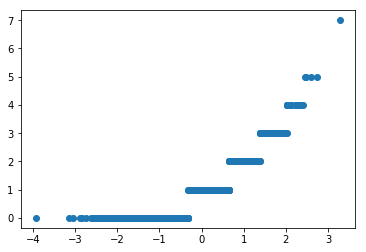

In [5]:
#plot the variable rand2 against norm in qqplots.
plt.plot(norm, rand2, "o")
plt.show()

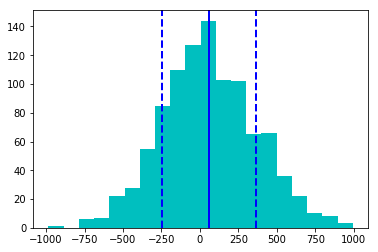

In [6]:
#Plot a histogram for rand1 
plt.hist(rand1, bins=20, color='c')

#Add a vertical line at the mean. 
plt.axvline(rand1.mean(), color='b', linestyle='solid', linewidth=2)

#Add a vertical line at 1 sd above the mean.
plt.axvline(rand1.mean() + rand1.std(), color='b', linestyle='dashed', linewidth=2)

#Add a vertical line at 1sd below the mean.
plt.axvline(rand1.mean()-rand1.std(), color='b', linestyle='dashed', linewidth=2)

plt.show()

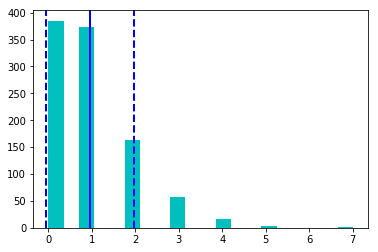

In [7]:
plt.hist(rand2, bins=20, color = 'c')

#Add a vertical line at the mean.
plt.axvline(rand2.mean(), color='b', linestyle='solid', linewidth=2)

#Add a vertical line one sd above and below the mean. 
plt.axvline(rand2.mean() + rand2.std(), color='b', linestyle='dashed', linewidth=2)

plt.axvline(rand2.mean() - rand2.std(), color='b', linestyle='dashed', linewidth=2)

plt.show()

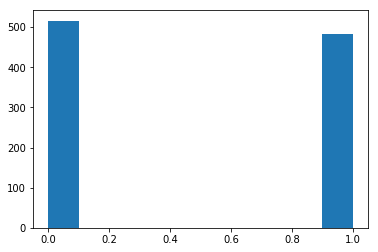

In [8]:
#Generate a bernoulli distribution with p =0.5.
bernoulli = np.random.binomial(1, .5, 1000)

#Plot a histogram
plt.hist(bernoulli)

plt.show()

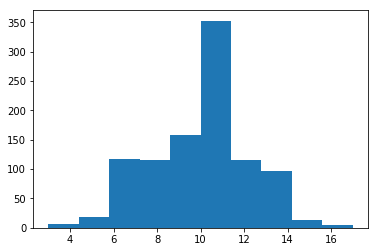

In [9]:
#Generate a binomial distribution with n=20 and p=0.5.
binomial = np.random.binomial(20, 0.5, 1000)

#Plot a histogram.
plt.hist(binomial)

#Print the histogram.
plt.show()

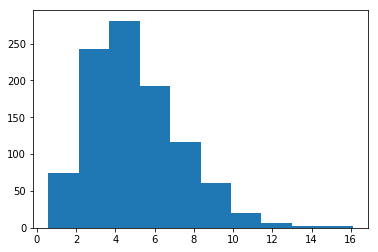

In [10]:
# Generate a gamma distribution with sahpe =5 and scale = 1. 
gamma = np.random.gamma(5, 1, 1000)

# Plot a histogram.
plt.hist(gamma)

plt.show()

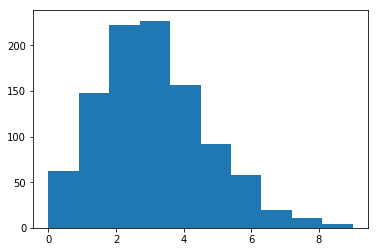

In [11]:
# Generate a Poisson distribution with lambda = 3. 
poisson = np.random.poisson(3, 1000)

# Plot a histogram.
plt.hist(poisson)

plt.show()

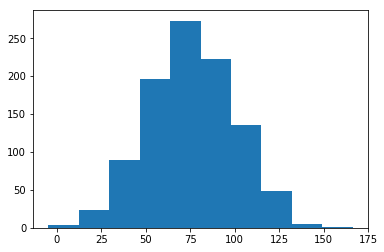

In [12]:
# Creating a data frame to hold the simulated ecommerce data, and populating it with a 
# normally distributed variable with mean 75 and sd 25.

ecommerce = pd.DataFrame()
ecommerce['spending'] = np.random.normal(75, 25, 1000)

# Plot a histogram.
plt.hist(ecommerce['spending'])
plt.show()

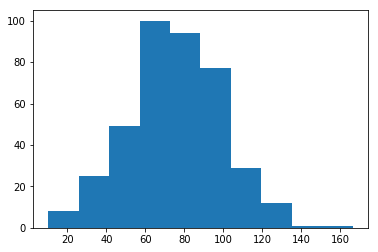

In [13]:
# Adding a variable with counts of number of ties visiting the site. 
ecommerce['visit_count'] = np.random.randint(0, 5, 1000)

# Selecting only the cases where the visit count is greater than two and plotting those.
plt.hist(ecommerce[ecommerce['visit_count'] > 2] ['spending'])
plt.show()

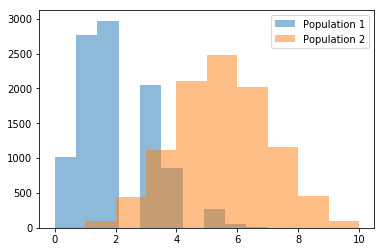

In [14]:
#Lesson 3 CLT

pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

# Make a histogram for two groups. 

plt.hist(pop1, alpha=0.5, label='Population 1')
plt.hist(pop2, alpha=0.5, label='Population 2')
plt.legend(loc='upper right')
plt.show()

#Populations are not normal

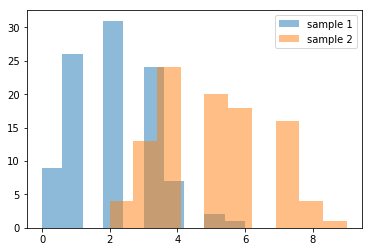

In [15]:
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

plt.hist(sample1, alpha=0.5, label='sample 1')
plt.hist(sample2, alpha=0.5, label='sample 2')
plt.legend(loc='upper right')

plt.show()

In [16]:
print(sample1.mean())
print(sample2.mean())
print(sample1.std())
print(sample2.std())

#Compute the diff between the two sample means. 
diff = sample2.mean() - sample1.mean()

print(diff)

2.04
5.04
1.2158947322856533
1.567928569801571
3.0


In [17]:
size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])

# The squared standard deviations are divided by the sample size, summed then we take the sqrt of the sum
diff_se = (sum(sd ** 2/size))** 0.5

# The diff between the means divided by the standard error = t - value
print(diff/diff_se)

15.119922973260605


In [18]:
from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=15.044133408414075, pvalue=5.225055682091929e-34)
